In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

In [344]:
df = pd.read_csv("dataframe.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/303519398/,Москва,sale,flat,11,13,5,265.6,...,Чистовая,-1,-1,74951346248,3 м,Дорогомилово,NaN,3к1,Парк Победы,Виктори Парк Резиденсез ЖК
1,ID 18174647,realtor,https://www.cian.ru/sale/flat/301450189/,Москва,sale,flat,26,31,5,246.7,...,-1,"140,9 м²",28 м²,79166462390,"3,1 м",Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
2,Monumental Group,real_estate_agent,https://www.cian.ru/sale/flat/306835123/,Москва,sale,flat,4,8,5,117.0,...,-1,-1,10 м²,79672086536,"3,2 м",Пресненский,Большая Садовая,3С1,Маяковская,NaN
3,Главстрой,developer,https://www.cian.ru/sale/flat/296921235/,Москва,sale,flat,24,24,5,172.5,...,Без отделки,"104,6 м²","10,5 м²",74951379308,"3,2 м",Филевский парк,Береговой проезд,2,Фили,Береговой-2
4,Рента,real_estate_agent,https://www.cian.ru/sale/flat/307983948/,Москва,sale,flat,3,9,5,234.8,...,-1,140 м²,23 м²,79663231016,-1,Тверской,Краснопролетарская,7,Новослободская,Ласточкино гнездо


In [345]:
df.shape

(7978, 27)

In [346]:
df.drop(columns=['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number'], inplace=True)
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Москва,11,13,5,265.6,405328840,2024,Новостройка,-1,-1,Монолитный,-1,Чистовая,-1,-1,3 м,Дорогомилово,NaN,Парк Победы,Виктори Парк Резиденсез ЖК
1,Москва,26,31,5,246.7,288063785,2008,Вторичка,3 балкона,Подземная,-1,-1,-1,"140,9 м²",28 м²,"3,1 м",Очаково-Матвеевское,Нежинская,Давыдково,Кутузовская Ривьера
2,Москва,4,8,5,117.0,58500000,1939,Вторичка,1 балкон,Открытая,-1,-1,-1,-1,10 м²,"3,2 м",Пресненский,Большая Садовая,Маяковская,NaN
3,Москва,24,24,5,172.5,207000000,2024,Новостройка,-1,-1,Монолитно-кирпичный,-1,Без отделки,"104,6 м²","10,5 м²","3,2 м",Филевский парк,Береговой проезд,Фили,Береговой-2
4,Москва,3,9,5,234.8,125000000,1999,Вторичка,"1 лоджия, 2 балкона",Подземная,-1,-1,-1,140 м²,23 м²,-1,Тверской,Краснопролетарская,Новослободская,Ласточкино гнездо


In [347]:
df.shape

(7978, 20)

<Figure size 1000x600 with 0 Axes>

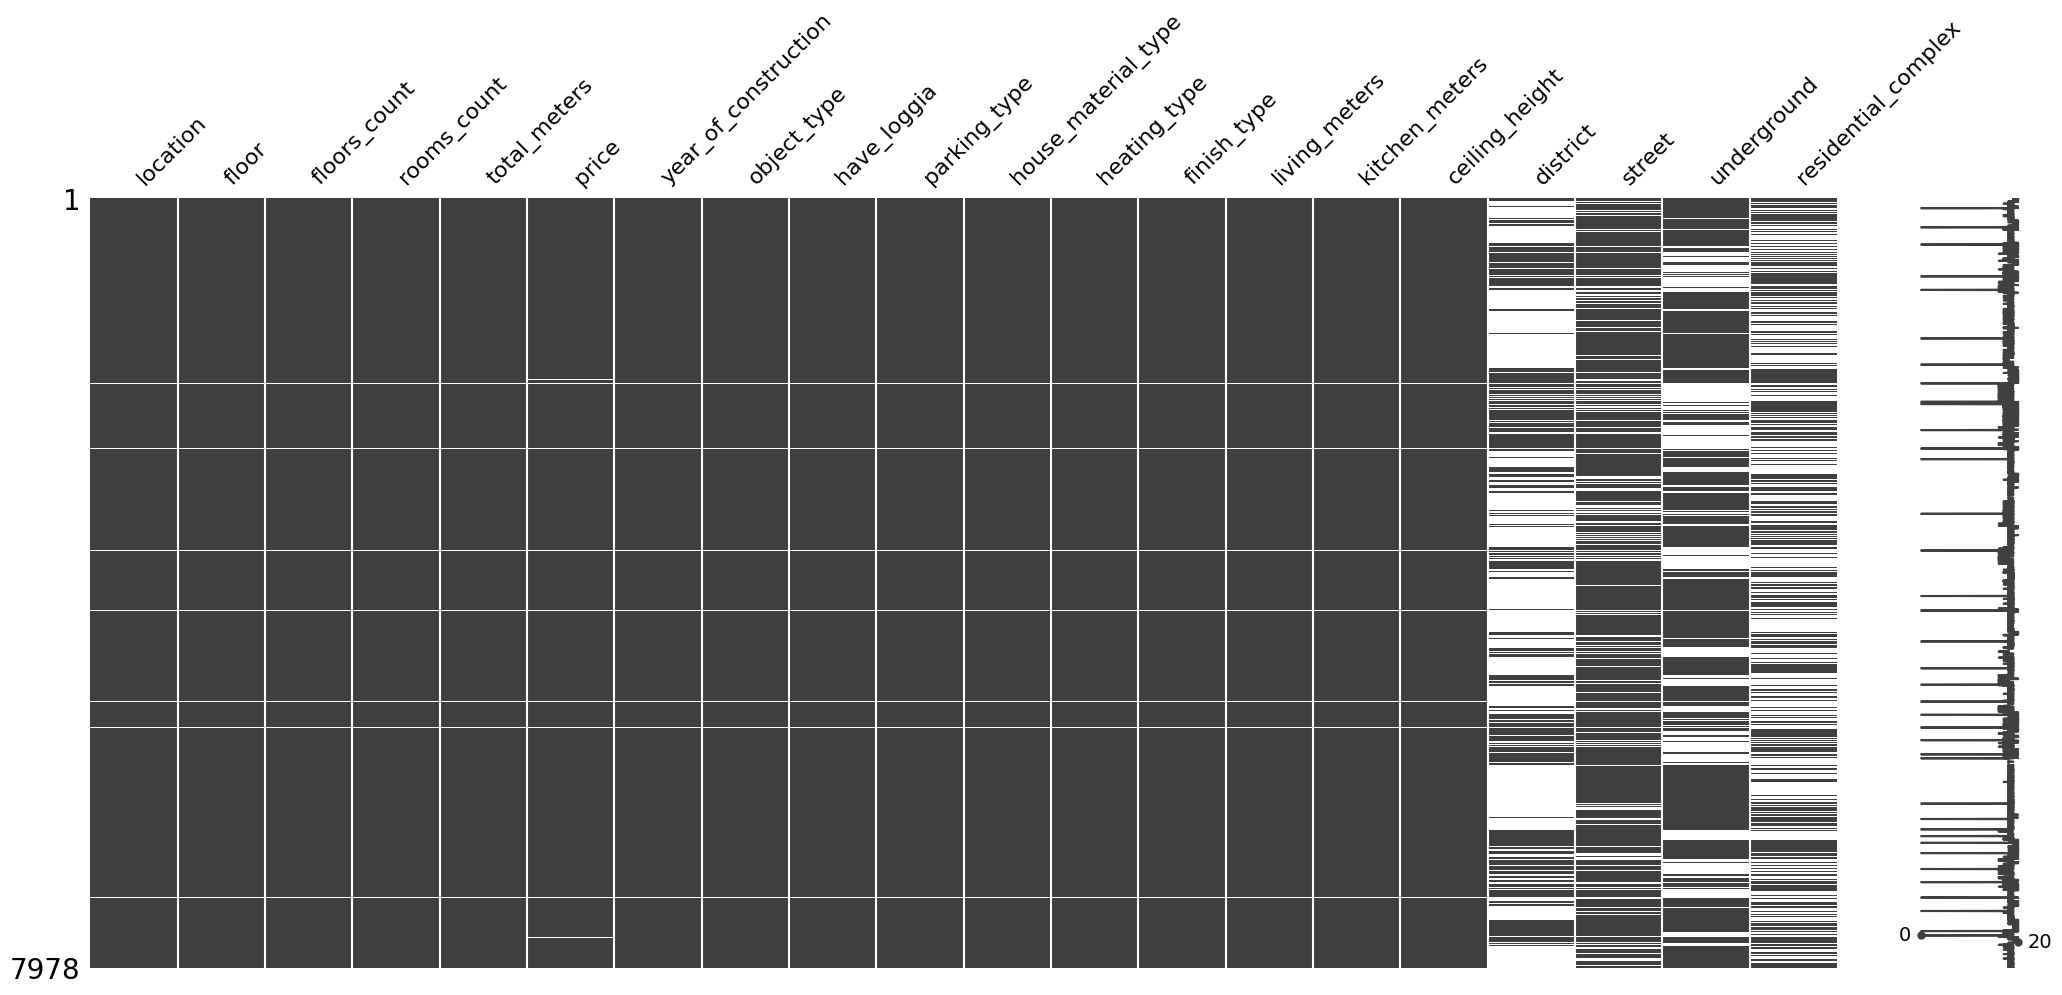

In [348]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

In [349]:
df = df.dropna(thresh=4)
df = df.drop_duplicates()
df.shape

(7215, 20)

In [350]:
df['have_loggia'] = df['have_loggia'].fillna('0')
df['parking_type'] = df['parking_type'].fillna('0')

In [351]:
null_counts_cian = df.isnull().sum().reset_index()
null_counts_cian.columns = ['Column', 'Null Count']


In [352]:
nul_price = df[df['price'].isnull() == True]
print(nul_price)
df = df.dropna(subset=['price'])

        location floor floors_count rooms_count total_meters price  \
1880      Москва    16           47           4         80.3   NaN   
1906      Москва     2           59           4         94.9   NaN   
2145    Одинцово     2           24           4        82.78   NaN   
2597  Котельники     2           59           2         31.1   NaN   
4499      Москва     6           59           5        103.9   NaN   
6658      Москва     8           59           3         56.1   NaN   
7048    Одинцово     2           24           1         36.3   NaN   
7130  Ивантеевка     2           59           2         31.1   NaN   
7149  Ивантеевка     9           12           3        115.1   NaN   
7292      Москва     2           59           2         31.1   NaN   
7483      Москва     2           59           1         30.4   NaN   
7597      Москва    14           21           1        38.93   NaN   
7661      Москва    11           21           3         74.5   NaN   

     year_of_constr

In [353]:
nul_p = df[df['price'].isnull() == True]
print(nul_p)

Empty DataFrame
Columns: [location, floor, floors_count, rooms_count, total_meters, price, year_of_construction, object_type, have_loggia, parking_type, house_material_type, heating_type, finish_type, living_meters, kitchen_meters, ceiling_height, district, street, underground, residential_complex]
Index: []


обработка нулей и данных

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7202 entries, 0 to 7977
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7202 non-null   object
 1   floor                 7202 non-null   object
 2   floors_count          7202 non-null   object
 3   rooms_count           7202 non-null   object
 4   total_meters          7202 non-null   object
 5   price                 7202 non-null   object
 6   year_of_construction  7202 non-null   object
 7   object_type           7202 non-null   object
 8   have_loggia           7202 non-null   object
 9   parking_type          7202 non-null   object
 10  house_material_type   7202 non-null   object
 11  heating_type          7202 non-null   object
 12  finish_type           7202 non-null   object
 13  living_meters         7202 non-null   object
 14  kitchen_meters        7202 non-null   object
 15  ceiling_height        7202 non-null   objec

In [355]:
print(df['floor'].unique())
df['floor'] = df['floor'].replace('floor', '3')
df['floor'] = df['floor'].astype('int64')
print('_' * 100)
df['floor'].unique()


['11' '26' '4' '24' '3' '57' '5' '23' '17' '15' '27' '10' '2' '13' '21'
 '8' '16' '9' '20' '19' '1' '7' '12' '14' '6' '22' '18' '37' '59' '32'
 '25' '31' '38' '40' '29' '36' '47' '82' '33' '46' '34' '30' '39' '75'
 '79' 'floor' '66' '60' '35' '51' '28' '41' '62' '48' '80' '53']
____________________________________________________________________________________________________


array([11, 26,  4, 24,  3, 57,  5, 23, 17, 15, 27, 10,  2, 13, 21,  8, 16,
        9, 20, 19,  1,  7, 12, 14,  6, 22, 18, 37, 59, 32, 25, 31, 38, 40,
       29, 36, 47, 82, 33, 46, 34, 30, 39, 75, 79, 66, 60, 35, 51, 28, 41,
       62, 48, 80, 53])

In [356]:
print(df['floors_count'].unique())
df['floors_count'].unique()
df['floors_count'] = (df['floors_count'].replace({'floors_count': '3', -1: np.nan}))
df['floors_count'] = df['floors_count'].astype(float)
mean_value = df['floors_count'].mean()
df['floors_count'] = df['floors_count'].fillna(mean_value)
df['floors_count'] = df['floors_count'].astype('int64')
print('_' * 100)
df['floors_count'].unique()


['13' '31' '8' '24' '9' '76' '5' '16' '17' '41' '27' '19' '11' '25' '4'
 '29' '14' '44' '28' '26' '36' '33' '2' '23' '39' '22' '45' '6' '20' '18'
 '21' '12' '10' '3' '15' '1' '7' '32' '37' '85' '53' '30' '42' '67' '63'
 '48' '47' '40' '55' '56' '35' '34' '49' '46' '79' '43' '95' '97' '65'
 '68' '64' '75' 'floors_count' '66' '57' '38' '51' '78' '52' '54' '77'
 '50']
____________________________________________________________________________________________________


array([13, 31,  8, 24,  9, 76,  5, 16, 17, 41, 27, 19, 11, 25,  4, 29, 14,
       44, 28, 26, 36, 33,  2, 23, 39, 22, 45,  6, 20, 18, 21, 12, 10,  3,
       15,  1,  7, 32, 37, 85, 53, 30, 42, 67, 63, 48, 47, 40, 55, 56, 35,
       34, 49, 46, 79, 43, 95, 97, 65, 68, 64, 75, 66, 57, 38, 51, 78, 52,
       54, 77, 50])

In [357]:
print(df['rooms_count'].unique())
df['rooms_count'] = (df['rooms_count'].replace({'rooms_count': '3', -1: np.nan}))
df['rooms_count'] = df['rooms_count'].astype(float)
mean_value = df['rooms_count'].mean()
df['rooms_count'] = df['rooms_count'].fillna(mean_value)
df['rooms_count'] = df['rooms_count'].astype(int)
df['rooms_count'].unique()

['5' '-1' '1' '3' '2' '4' 'rooms_count']


array([ 5, -1,  1,  3,  2,  4])

In [358]:
df['total_meters'] = df['total_meters'].replace(-1, 0)

print(df)


     location  floor  floors_count  rooms_count total_meters      price  \
0      Москва     11            13            5        265.6  405328840   
1      Москва     26            31            5        246.7  288063785   
2      Москва      4             8            5        117.0   58500000   
3      Москва     24            24            5        172.5  207000000   
4      Москва      3             9            5        234.8  125000000   
...       ...    ...           ...          ...          ...        ...   
7973    Химки      2             5            2         43.5    7700000   
7974    Химки      2            16            2         60.4   11850480   
7975    Химки      7            17            2         41.0    9000000   
7976    Химки      4             5            2         45.0    7900000   
7977    Химки      7             8            2         61.8   10689285   

     year_of_construction  object_type          have_loggia    parking_type  \
0                   